Author: Nik Alleyne <br>
Author Blog: https://www.securitynik.com <br>
Author GitHub:github.com/securitynik <br>
Author Books: [  <br>
                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",  <br>
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" <br>
            ] <br>


## 15. Beginning Deep Learning, - Linear Regression, PyTorch

This post is part of my beginning machine learning series.  <br>
The series includes the following: <br>

01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning, - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning, - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning, - Classification, Tensorflow <br>
17 - Beginning Deep Learning, - Classification, Pytorch <br>
18 - Beginning Deep Learning, - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning, - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning, - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
23 - Beginning Model TFServing <br>

But conn.log is not the only file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

24 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
25 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
26 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 26 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>


In [1]:
# Let's import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
# This is the data we previously saved from the Pandas notebook
#   04 - Beginning Pandas <br>
df_conn = pd.read_csv(r'df_conn_cleaned.csv', index_col=0)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0
1,10.0.0.4,27761,10.0.0.4,48798,0.000000,0,0,0,0,0,0
2,10.0.0.4,27761,10.0.0.4,48804,0.000000,0,0,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0
4,10.0.0.4,48786,10.0.0.4,27761,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4430183,10.0.0.21,55757,10.0.0.4,9200,0.000051,0,0,1,52,1,40
4430184,10.0.0.4,37236,10.0.0.4,9200,0.000023,0,0,0,0,1,40
4430185,10.0.0.4,37244,10.0.0.4,9200,0.000005,0,0,0,0,1,40
4430186,10.0.0.4,37246,10.0.0.4,9200,0.000005,0,0,0,0,1,40


This file represents Zeek (formerly Bro) connection log - conn.log`. <br>
Zeek is a framework used for Network Security Monitoring.  <br>
This entire series is based on using Zeek's data.  <br>
The majority of the notebooks use the conn.log <br>
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html


In [3]:
# Looking at above, we see a number of records with 0s. 
# These will add no value to our learning process
# I know you might be saying, why didn't we fix these earlier. 
# Good question, we are learning (pun intended) as we go along.
# Besides you learn more about your data as you work with your data
# Or as it is said, if you interrogate the data long enough, it will confess
#   https://quoteinvestigator.com/2021/01/18/confess/
# Let's find all those records and drop them
# Reference: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df_conn = df_conn.drop(df_conn[(df_conn.duration == 0 ) & (df_conn.orig_bytes == 0 ) 
                               & (df_conn.resp_bytes == 0 ) & (df_conn.orig_pkts == 0 )  
                               & (df_conn.orig_ip_bytes == 0 ) & (df_conn.resp_pkts == 0 ) 
                               & (df_conn.resp_ip_bytes == 0 )].index)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5,10.0.0.10,52824,89.187.183.77,8888,0.053276,208,976,6,528,6,1296
6,10.0.0.10,52826,89.187.183.77,8888,0.383646,227,692369,202,10739,117,240893
7,10.0.0.10,52828,89.187.183.77,8888,0.054294,208,977,6,528,6,1297
8,10.0.0.10,52830,89.187.183.77,8888,0.424980,227,791633,176,9387,174,367737
9,10.0.0.10,52832,89.187.183.77,8888,0.272567,227,406607,171,9127,71,169939
...,...,...,...,...,...,...,...,...,...,...,...
4430183,10.0.0.21,55757,10.0.0.4,9200,0.000051,0,0,1,52,1,40
4430184,10.0.0.4,37236,10.0.0.4,9200,0.000023,0,0,0,0,1,40
4430185,10.0.0.4,37244,10.0.0.4,9200,0.000005,0,0,0,0,1,40
4430186,10.0.0.4,37246,10.0.0.4,9200,0.000005,0,0,0,0,1,40


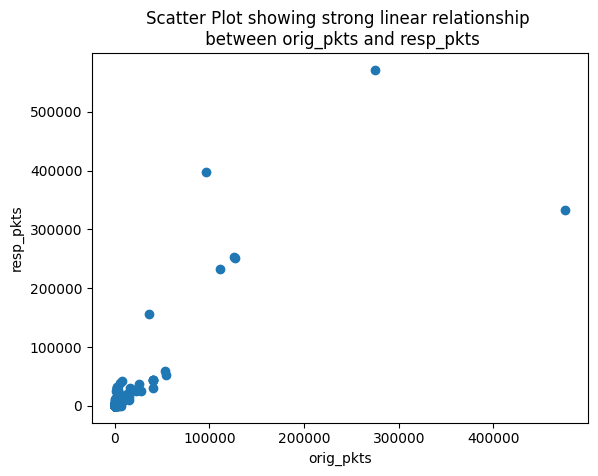

In [4]:
# Confirming the positive correlation between the resp_bytes and resp_pkts
# We can see from below, generally, as x increases, y increases
# and as y increases, x increases. 
# Hence our strong positive correlation.
# What we need is a line that best fits this data
# Meaning, we need a m and b for y = mx + b
# The question is which line works best?
plt.title('Scatter Plot showing strong linear relationship \n between orig_pkts and resp_pkts')
plt.scatter(df_conn['orig_pkts'], df_conn['resp_pkts'])
plt.xlabel('orig_pkts')
plt.ylabel('resp_pkts')
plt.show()

In [5]:
# Further confirming the positive linear correlation
df_conn.orig_pkts.corr(other=df_conn.resp_pkts, method='pearson')

0.8400252261323242

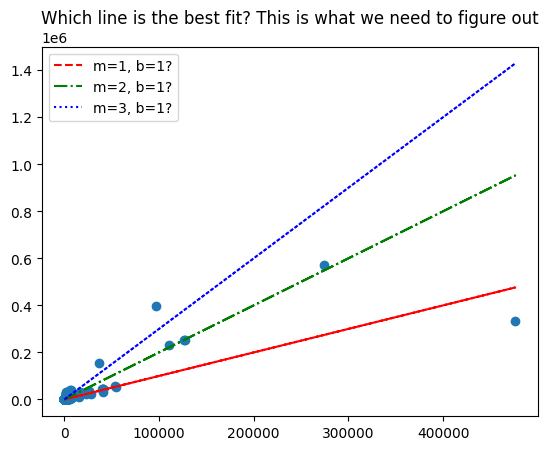

In [6]:
# Trying to figure out which line best fits our data
# As in which one will produce the smallest error
plt.title('Which line is the best fit? This is what we need to figure out')
plt.scatter(df_conn['orig_pkts'], df_conn['resp_pkts'])
plt.plot(df_conn.orig_pkts, (1 * df_conn.orig_pkts) + 1, label='m=1, b=1?', c='r', linestyle='--' )
plt.plot(df_conn.orig_pkts, (2 * df_conn.orig_pkts) + 1, label='m=2, b=1?', c='g', linestyle='dashdot' )
plt.plot(df_conn.orig_pkts, (3 * df_conn.orig_pkts) + 1, label='m=3, b=1?', c='b', linestyle='dotted' )
plt.legend(loc='best')


In [7]:
# Setup our x and y
X = df_conn['orig_pkts'].values.astype(np.float32).reshape(-1,1)
y = df_conn['resp_pkts'].values.astype(np.float32).reshape(-1,1)

# Get a view of the data
X[:5], y[:5]

(array([[  6.],
        [202.],
        [  6.],
        [176.],
        [171.]], dtype=float32),
 array([[  6.],
        [117.],
        [  6.],
        [174.],
        [ 71.]], dtype=float32))

In [8]:
# Import the scaler to scale the data
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Setup the scaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

# Fit on the normal data
min_max_scaler.fit(X)

# Transform the normal data
X_scaled = min_max_scaler.transform(X)
X_scaled

array([[1.2604194e-05],
       [4.2434121e-04],
       [1.2604194e-05],
       ...,
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [10]:
# Because we learned about Linear Regression in 
#   11. Beginning Linear Regression - Machine Learning
# I will jump straight into the deep learning part of Linear Regression

In [11]:
# Import the PyTorch library
import torch

In [12]:
# Set the manual seed
torch.manual_seed(seed=10)

# Setup the torch model
#   https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html
torch_lr_model = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=4),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=4, out_features=4),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=4, out_features=1),
)

In [13]:
# Get a look at the model
torch_lr_model

Sequential(
  (0): Linear(in_features=1, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [14]:
# Looking at the state dictionary
# This gives insights into the intial weights and biases
torch_lr_model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0838],
                      [-0.0343],
                      [-0.3750],
                      [ 0.2300]])),
             ('0.bias', tensor([-0.5721, -0.1763,  0.3876,  0.9386])),
             ('2.weight',
              tensor([[ 0.1178, -0.1696,  0.0479, -0.0560],
                      [ 0.2041,  0.0573,  0.1959,  0.4849],
                      [-0.2076, -0.0177,  0.1150, -0.0033],
                      [-0.0479, -0.4425, -0.4313, -0.4499]])),
             ('2.bias', tensor([-0.4892, -0.4657, -0.3788, -0.4510])),
             ('4.weight', tensor([[-0.4690,  0.2192,  0.3067,  0.3379]])),
             ('4.bias', tensor([0.2694]))])

In [15]:
# Look at the summary
from torchinfo import summary

In [16]:
# Get the summary of the model
summary(torch_lr_model, depth=5)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            8
├─ReLU: 1-2                              --
├─Linear: 1-3                            20
├─ReLU: 1-4                              --
├─Linear: 1-5                            5
Total params: 33
Trainable params: 33
Non-trainable params: 0

In [17]:
# Before training the model, split the data into train and test set
# import the train test split library
from sklearn.model_selection import train_test_split

In [18]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, \
                                                    train_size=0.8, random_state=10, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((167988, 1), (41998, 1), (167988, 1), (41998, 1))

In [19]:
# Convert the numpy arrays to torch tensors as numpy arrays raise an error
X_train, X_test = torch.tensor(X_train, dtype=torch.float), torch.tensor(X_test, dtype=torch.float)

# View the first 5 records of both and we now see have tensors
X_train[:5], X_test[:5]

(tensor([[2.1007e-06],
         [1.4705e-05],
         [2.1007e-06],
         [2.1007e-06],
         [3.7813e-05]]),
 tensor([[9.1170e-04],
         [2.1007e-06],
         [1.0503e-05],
         [2.1007e-06],
         [1.2604e-05]]))

In [20]:
# Do the same for the training data
y_train, y_test = torch.tensor(y_train, dtype=torch.float), torch.tensor(y_test, dtype=torch.float)

# View the first 5 records of both and we now see have tensors
y_train[:5], y_test[:5]

(tensor([[ 1.],
         [ 5.],
         [ 1.],
         [ 1.],
         [18.]]),
 tensor([[649.],
         [  1.],
         [  6.],
         [  1.],
         [  5.]]))

In [21]:
# Prepare to visualize the model
# https://github.com/mert-kurttutan/torchview
from torchview import draw_graph


(dot.exe:6660): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


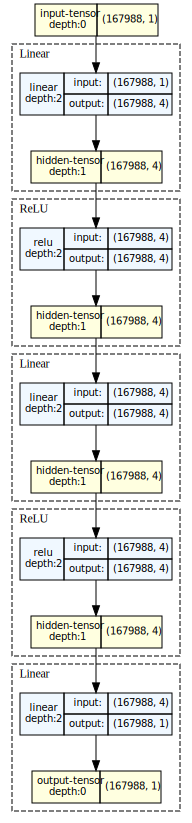

In [22]:
# Plot the model
# https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch
model_graph = draw_graph(model=torch_lr_model, input_data=X_train, graph_name='torch_linear_model', \
                         expand_nested=True, save_graph=False,show_shapes=True, graph_dir='TB', \
                            roll=True, hide_inner_tensors=False, hide_module_functions=False)
model_graph.visual_graph

In [23]:
# Create a function to plot the regression line
def plot_regression_line(model=torch_lr_model, epochs=0):
    ''' Plots the regression line '''
    x_line = torch.linspace(start=0., end=1., steps=len(X_train) )

    # Set the model up for evaluation
    model.eval()
    with torch.no_grad():
        y = model(x_line.reshape(-1, 1))
    
    # Setup the plot
    plt.title(f'Model after {epochs} epochs')
    plt.scatter(x=X_train, y=y_train, label='train data points')
    plt.plot(x_line, y.clone().detach(), color='red', linestyle='--', label='regression line')
    plt.legend(loc='best')
    plt.show()

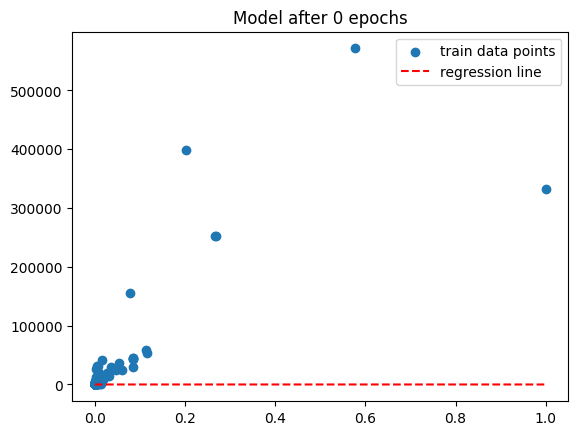

In [24]:
# Earlier, we wanted to know which line fits best.
# Let's see what type of line we get without the model being trained

# Plot the regression line
plot_regression_line()

In [25]:
# Define a function to evaluate the models
def evaluate_model(model=torch_lr_model, data=X_train):
   ''' Evaluate the model '''
   model.eval()
   with torch.no_grad():
      return model(data)

In [26]:
# Ohhh la la. What a terrible line?
# Make a prediction on the x_train samples before training the model
# We should not be expecting anything meaningful here.
# Just wanted to show you could predicted on the untrained model
# Evaluate the model
# https://stackoverflow.com/questions/60018578/what-does-model-eval-do-in-pytorch

# Make some predictions on the training data
untrained_preds = evaluate_model()
untrained_preds

tensor([[0.2837],
        [0.2837],
        [0.2837],
        ...,
        [0.2837],
        [0.2837],
        [0.2837]])

In [27]:
# Get the untrained model's r2 score
from sklearn.metrics import r2_score

In [28]:
# The r2 with a value of 1, means the model is perfect
# r2 of 0 means the model is not doing better than average
# r2 of less than 0 means the model is terrible
# This score suggest this model is terrible. 
# Then again, we knew this from looking at the plot above
r2_score(y_true=y_train, y_pred=untrained_preds)

-0.0005821945972275255

In [29]:
# Define the epochs variable
EPOCHS = 50

# Store the loss for both training and testing data
training_loss = []
validation_loss = []

# Setup the MSE loss function
lr_loss_fn = torch.nn.MSELoss(reduction='mean')

# Setup the optimizer
lr_optimizer = torch.optim.Adam(params=torch_lr_model.parameters(),   lr=1.)

# Show the loss function and optimizer
lr_loss_fn, lr_optimizer

(MSELoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 1.0
     maximize: False
     weight_decay: 0
 ))

In [30]:
# With the above in place, train the model
for epoch in range(EPOCHS):
    # Zero out the gradients
    lr_optimizer.zero_grad()

    # Put the model in training mode
    torch_lr_model.train()

    # Make the predictions
    y_preds = torch_lr_model(X_train)
    
    # Get the loss
    train_loss = lr_loss_fn(y_preds, y_train)
    training_loss.append(train_loss)

    # Calculate the gradients
    train_loss.backward()

    # Upgrade the gradients
    lr_optimizer.step()

    # Evaluate the model at the same time
    torch_lr_model.eval()
    with torch.inference_mode():
        val_preds = torch_lr_model(X_test)

        # Calculate the loss on the validation data
        val_loss = lr_loss_fn(val_preds, y_test)

        # Add the test loss to the list
        validation_loss.append(val_loss)

    if epoch %10 == 0:
        print(f'Epoch: {epoch} \t Train Loss: {train_loss} \t Validation Loss: {val_loss}')

torch_lr_model.zero_grad()

Epoch: 0 	 Train Loss: 4653422.5 	 Validation Loss: 1473550.625
Epoch: 10 	 Train Loss: 4647975.5 	 Validation Loss: 1471650.375
Epoch: 20 	 Train Loss: 4587437.5 	 Validation Loss: 1454772.75
Epoch: 30 	 Train Loss: 4286667.0 	 Validation Loss: 1373441.875
Epoch: 40 	 Train Loss: 3500250.0 	 Validation Loss: 1177940.875


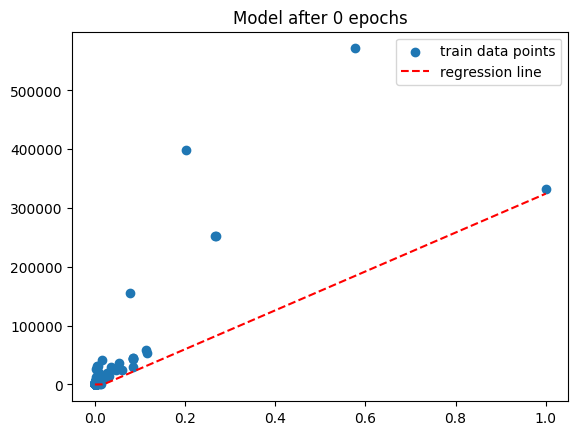

In [31]:
# How did we do after 50 epochs
# Plot the regression line
plot_regression_line()

In [32]:
# Above the line shows improvement. 
# That suggest we are heading in the right direction.
# More epochs?

# Get some predictions on the train data
epochs_50_preds = evaluate_model()

In [33]:
# Get the model r2 on the training data
# Below shows good improvement
r2_score(y_true=y_train, y_pred=epochs_50_preds)

0.5397006361585593

In [34]:
# Define a function to reset the model parameters after training
# Basically we want to restart training from scratch, using the original initial parameters
def reset_model_parameters(model=torch_lr_model):
    ''' This function reset the model parameters 
    https://stackoverflow.com/questions/63627997/reset-parameters-of-a-neural-network-in-pytorch
    https://discuss.pytorch.org/t/reset-the-parameters-of-a-model/29839/3
    '''
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            print(f'Resetting layer: {layer}')
            layer.reset_parameters()
        else:
            print(f'Unable to reset: {layer}')

In [35]:
# Set the manual seed
torch.manual_seed(seed=10)

# Call the function to reset the model parameters
reset_model_parameters()

Resetting layer: Linear(in_features=1, out_features=4, bias=True)
Unable to reset: ReLU()
Resetting layer: Linear(in_features=4, out_features=4, bias=True)
Unable to reset: ReLU()
Resetting layer: Linear(in_features=4, out_features=1, bias=True)


In [36]:
# The weights have been reset to the original
# We can compare this with above
torch_lr_model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0838],
                      [-0.0343],
                      [-0.3750],
                      [ 0.2300]])),
             ('0.bias', tensor([-0.5721, -0.1763,  0.3876,  0.9386])),
             ('2.weight',
              tensor([[ 0.1178, -0.1696,  0.0479, -0.0560],
                      [ 0.2041,  0.0573,  0.1959,  0.4849],
                      [-0.2076, -0.0177,  0.1150, -0.0033],
                      [-0.0479, -0.4425, -0.4313, -0.4499]])),
             ('2.bias', tensor([-0.4892, -0.4657, -0.3788, -0.4510])),
             ('4.weight', tensor([[-0.4690,  0.2192,  0.3067,  0.3379]])),
             ('4.bias', tensor([0.2694]))])

In [37]:
# Leverage TQDM progress bar
from tqdm import tqdm

In [38]:
# We saw progress above in our regression line
# Let's train again, this time for 300 epochs 
EPOCHS = 300

# With the above in place, train the model
for epoch in tqdm(range(EPOCHS)):
    # Zero out the gradients
    lr_optimizer.zero_grad()

    # Put the model in training mode
    torch_lr_model.train()

    # Make the predictions
    y_preds = torch_lr_model(X_train)
    
    # Get the loss
    train_loss = lr_loss_fn(y_preds, y_train)
    training_loss.append(train_loss)

    # Calculate the gradients
    train_loss.backward()

    # Upgrade the gradients
    lr_optimizer.step()

    # Evaluate the model at the same time
    torch_lr_model.eval()
    with torch.inference_mode():
        val_preds = torch_lr_model(X_test)

        # Calculate the loss on the validation data
        val_loss = lr_loss_fn(val_preds, y_test)

        # Add the test loss to the list
        validation_loss.append(val_loss)

    if epoch %50 == 0:
        print(f'Epoch: {epoch} \t Train Loss: {train_loss} \t Validation Loss: {val_loss}')

torch_lr_model.zero_grad()

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch: 0 	 Train Loss: 4653422.5 	 Validation Loss: 1474011.375


 19%|█▉        | 57/300 [00:01<00:07, 31.40it/s]

Epoch: 50 	 Train Loss: 8414703.0 	 Validation Loss: 376461.9375


 35%|███▌      | 105/300 [00:03<00:06, 31.93it/s]

Epoch: 100 	 Train Loss: 2078084.5 	 Validation Loss: 728123.9375


 52%|█████▏    | 157/300 [00:04<00:04, 31.88it/s]

Epoch: 150 	 Train Loss: 1836941.0 	 Validation Loss: 589078.5


 68%|██████▊   | 205/300 [00:06<00:02, 32.05it/s]

Epoch: 200 	 Train Loss: 1652488.5 	 Validation Loss: 502892.21875


 84%|████████▍ | 253/300 [00:07<00:01, 30.80it/s]

Epoch: 250 	 Train Loss: 1480668.125 	 Validation Loss: 416732.34375


100%|██████████| 300/300 [00:09<00:00, 31.58it/s]


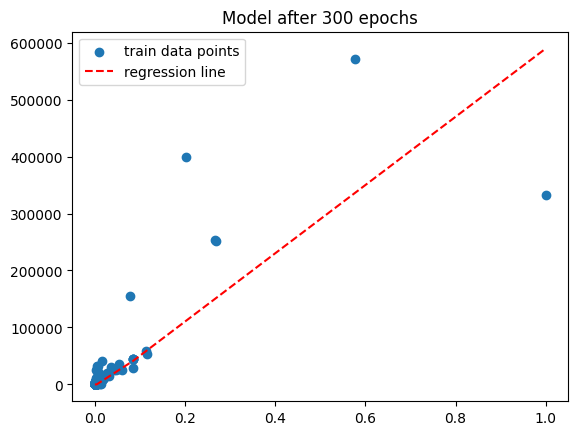

In [39]:
# How did we do after 200 epochs
plot_regression_line(epochs=EPOCHS)

In [40]:
# 300 epochs looks like we are in a reasonable position to generalize
# Get some predictions
epochs_300_preds = evaluate_model()

In [41]:
# Get the model r2
# Below shows not much improvement improvement
r2_score(y_true=y_train, y_pred=epochs_300_preds)

0.6806577884853824

In [42]:
# How are we doing on the test data
# Get some predictions
epochs_300_test_preds = evaluate_model(data=X_test)

# Get the model r2 on the test data
r2_score(y_true=y_test, y_pred=epochs_300_test_preds)


0.7256186802687081

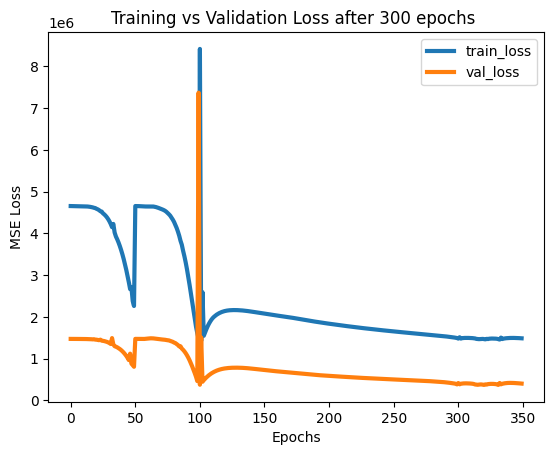

In [43]:
# Above does not look too bad
# Additionally, the model seems to be doing better on the test data than the training data. Interesting
# Plotting the training loss values
plt.title(f'Training vs Validation Loss after {EPOCHS} epochs ')

# Trying to plot on the "training_loss" by itself will not work
# Matplotlib will more than likely throw an error
# Hence we needed to do "torch.tensor(training_loss).detach().numpy()"
plt.plot(torch.tensor(training_loss).detach().numpy(), lw=3, label='train_loss')
plt.plot(torch.tensor(validation_loss).detach().numpy(), lw=3, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

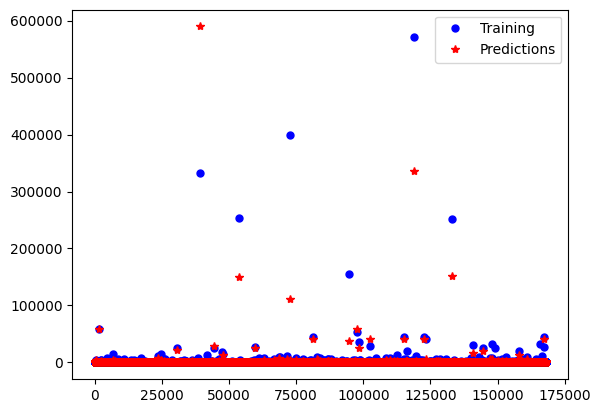

In [44]:
# With the trained model. Plot the training data
# Plotting the train predictions vs actual values, shows that the model does not seem to be doing too bad
plt.plot(y_train, linestyle='', marker='o', c='b', markersize=5, label='Training')

# Plot the predicted data
plt.plot(epochs_300_preds, linestyle='', marker='*', c='r', label='Predictions')
plt.legend()
plt.show()

In [45]:
# Quite a few of the predictions seems to fall inline with the original values
# However, see some predicted values that are definitely different from the original values
# Looking at the learned parameters - weights and biases
# Did you notice this and # "list(torch_lr_model.eval().parameters())" returns the same output?
torch_lr_model.state_dict()

OrderedDict([('0.weight',
              tensor([[-8.3831e-02],
                      [-3.4287e-02],
                      [ 8.6242e+01],
                      [ 1.2509e+02]])),
             ('0.bias', tensor([-0.5721, -0.1763, -7.0731, -0.2470])),
             ('2.weight',
              tensor([[ 1.1780e-01, -1.6963e-01,  4.7942e-02, -5.6036e-02],
                      [ 2.0409e-01,  5.7251e-02, -7.1458e+00,  3.0455e+01],
                      [-2.0763e-01, -1.7671e-02,  2.7729e+01,  8.4044e+01],
                      [-4.7888e-02, -4.4248e-01, -4.3130e-01, -4.4993e-01]])),
             ('2.bias', tensor([ -0.4892, -11.6295, -17.3018,  -0.4510])),
             ('4.weight', tensor([[-0.4690, 17.2540, 42.1383,  0.3379]])),
             ('4.bias', tensor([19.8392]))])

In [46]:
# Make a prediction on a single item. Think new sample.
# Setup the sample
new_sample = np.array([1500], dtype=np.float32, ndmin=2)
new_sample

array([[1500.]], dtype=float32)

In [47]:
# Remember, all data on which prediction needs to be made,
# has to go through the same preprocessing steps before making prediction
# Scaling the data
new_sample_scaled = min_max_scaler.transform(X=new_sample)
new_sample_scaled


array([[0.00315105]], dtype=float32)

In [48]:
# Convert the data to a torch tensor
new_sample = torch.tensor(new_sample_scaled)
new_sample

tensor([[0.0032]])

In [49]:
# Make the prediction on the sample data
evaluate_model(data=new_sample)

tensor([[19.8392]])

In [50]:
# We did a prediction on a sample data point
# How are we doing with the test data
# Revisiting this as we looked at it during training already
# Making predictions on the test data
test_preds = evaluate_model(data=X_test)
test_preds

tensor([[19.8392],
        [19.8392],
        [19.8392],
        ...,
        [19.8392],
        [19.8392],
        [19.8392]])

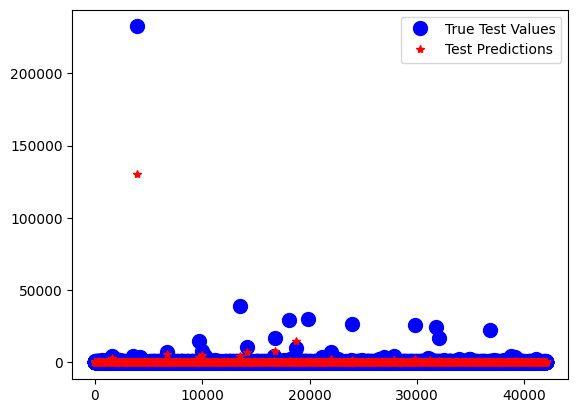

In [51]:
# With the trained model. Plot the test data
# Below seems to suggest the model is not doing too bad, when comparing the true y with the predicted y
plt.plot(y_test, linestyle='', marker='o', c='b', markersize=10, label='True Test Values')

# Plot the predicted data
plt.plot(test_preds, linestyle='', marker='*', c='r', label='Test Predictions')
plt.legend()
plt.show()

In [52]:
# Looks like we can save this model at this time
# importing the the os library
import os

In [53]:
# Create the location to save the model
PATH = './SAVED_MODELS/LR_PYTORCH/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

In [54]:
# Save the model
torch.save(obj=torch_lr_model, f=F'{PATH}/lr_torch_model_saved_dict.pth')

In [55]:
# Load the saved model
loaded_lr_torch_model = torch.load(f=f'{PATH}lr_torch_model_saved_dict.pth')
loaded_lr_torch_model


Sequential(
  (0): Linear(in_features=1, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [56]:
# Make predictions on the loaded model
loaded_lr_torch_model.eval()
loaded_lr_torch_model(torch.tensor(new_sample_scaled, dtype=torch.float))

tensor([[19.8392]], grad_fn=<AddmmBackward0>)

In [ ]:
# Time to move on